In [2]:
import numpy as np 
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [43]:
v_t = np.random.normal(loc=0.0, scale=1.0, size=None)


In [44]:
white_noise = []

In [45]:
for i in range(300):
    v_t = np.random.normal(loc=0.0, scale=1.0, size=None)
    white_noise.append(v_t)


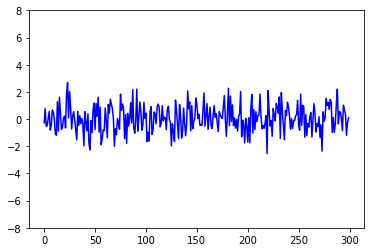

In [47]:
plt.plot(white_noise,'blue')
plt.ylim((-8,8))
plt.show()

In [52]:
# ar1 
x=[0]
for i in range(300):
    x_t_1 = 0.7*x[i]+white_noise[i]
    x.append(x_t_1)

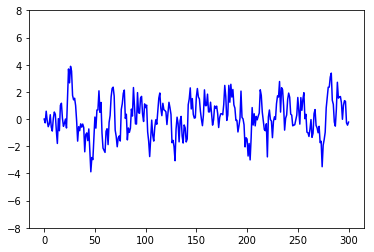

In [53]:
plt.plot(x,'blue')
plt.ylim((-8,8))
plt.show()

In [180]:
#garch error
epsilon = [0]
for i in range(300):
    a =  math.sqrt(1+0.8*(epsilon[i]**2))
    epsilon_t = white_noise[i]*a
    epsilon.append(epsilon_t)
#epsilon

NameError: name 'white_noise' is not defined

In [86]:
#取前三百個
eps = epsilon[0:300]

In [89]:
#ar1 fit arch1
x=[0]
for i in range(300):
    x_t_1 = 0.9*x[i]+eps[i]
    x.append(x_t_1)

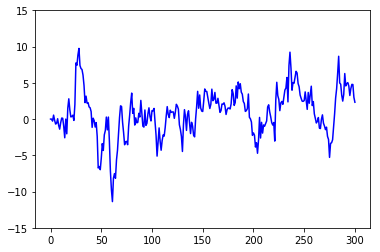

In [93]:
plt.plot(x,'blue')
plt.ylim((-15,15))
plt.show()

In [128]:
trend=[]
for i in range(700):
    t_trend = i
    trend.append(t_trend)
trend = np.array(trend)

In [62]:
len(trend)

300

In [143]:
#ar1 + arch1 + trend
x=[0]
for i in range(300):
    x_t_1 = 0.9*x[i]+eps[i]+0.02*trend[i]
    x.append(x_t_1)

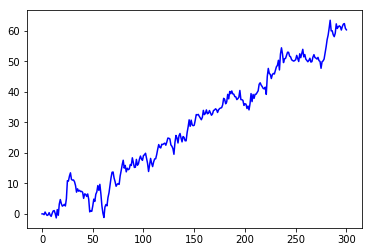

In [144]:
plt.plot(x,'blue')
#plt.ylim((-10,80))
plt.show()

In [149]:
# arima 資料長度為先改為500筆，前20比捕0，最後再取最後300筆感覺比較好

#step1 先製造出eplison
x=[]
for i in range(20):
    x.append(0)
for i in range(480):
    x.append(np.random.normal(loc=0.0, scale=1.0, size=None))


# 開始

# NO.1_arima(1,1) fit Garch(1,1)+trend  lv1

## epls = v_t*sqrt(h_t)

In [386]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 0.3
a_1 = 0.2
b_1 = 0.3
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [384]:
#h_t

In [387]:
#arima(1,1) fit Garch(1,1)
ma_lag1=0.225
ar_lag1=0.8
m=[0]

for i in range(1,500):
    x_t_1 =0.2+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]+0.01*trend[i]
    m.append(x_t_1)

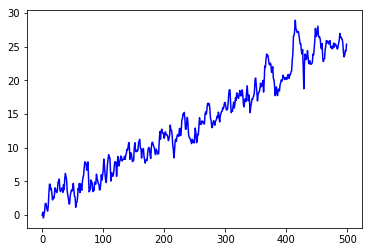

In [388]:
plt.plot(m,'blue')
#plt.ylim((-10,80))
plt.show()#取後三百比資料

In [389]:
m_new=m[-300:]
len(m_new)

300

In [390]:
df = pd.DataFrame(data=m_new)

In [391]:
df.to_csv ('1-1arima11garch11.csv')

In [ ]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('arima11garch11.csv')

# NO2.ar(2)+IGARCH 參考課本161 lv1

In [395]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0,0]###garch(1,1會有兩個起始點)
h_t = [0,0]

a_0 = 0.008
a_1 = 0.09
b_1 = 0.91
for i in range(520):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i] 
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [396]:
#h_t
ar_lag1=-0.062
m=[0,0]
ar_lag2=-0.045
for i in range(2,520):
    x_t_1 =0.061+ ar_lag1*m[i-1] + ar_lag2*m[i-2] + epls[i] 
    m.append(x_t_1)


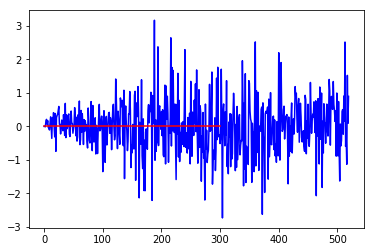

In [397]:
plt.plot(m,'blue')
plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [398]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('1-2ar(2)+IGARCH.csv')

# NO3.ar1+ arch1 p178- lv1

In [405]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 1.19
a_1 = 0.663
for i in range(502):
    ht = a_0 + a_1* (epls[i]**2)  
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [406]:
ar_lag1=0.886
m=[0]
for i in range(1,501):
    x_t_1 = ar_lag1*m[i-1]  + epls[i] 
    m.append(x_t_1)


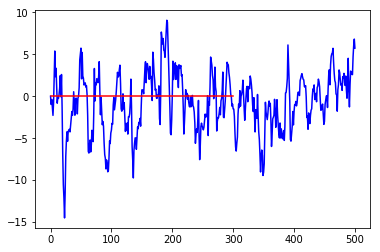

In [407]:
plt.plot(m,'blue')
plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [408]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('1-3ar1+ arch1.csv')

# NO4.arima[2,(1,7)]+garch1,1 p136 level1

In [409]:
epls= [0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0]

a_0 = 0.017
a_1 = 0.233
b_1 = 0.697
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [410]:
ma_lag1=0.686
ar_lag1=0.514
ar_lag2=0.304
ma_lag7=-0.13
m=[0,0,0,0,0,0,0]

for i in range(1,500):
    x_t_1 =0.192+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]+ma_lag7*epls[i-7]
    m.append(x_t_1)

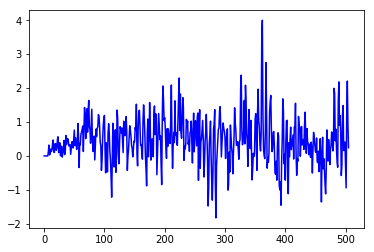

In [411]:
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [412]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('1-4arima[2,(1,7)]+garch1,1.csv')

# NO5.ma(1,3)+garch(1,1) p134 level1

In [416]:
epls= [0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0]

a_0 = 0.402
a_1 = 0.097
b_1 = 0.881
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [417]:
ma_lag1=0.177
ma_lag3=0.095
m=[0,0,0]

for i in range(1,500):
    x_t_1 =0.127 + epls[i] + ma_lag1*epls[i-1]+ma_lag3*epls[i-3]
    m.append(x_t_1)

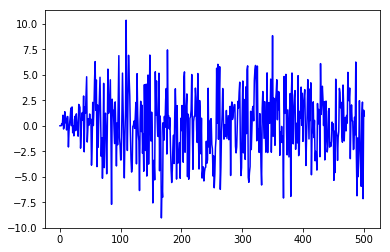

In [418]:
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [419]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('1-5ma(1,3)+garch(1,1).csv')

# NO6.arima (3,2)+arch(1) level1

In [420]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0]

a_0 = 1.19
a_1 = 0.457
for i in range(502):
    ht = a_0 + a_1* (epls[i]**2)  
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [421]:
ar_lag1=0.114
ar_lag2=0.304
ar_lag3=-0.314
ma_lag1=-0.286
ma_lag2=-0.13

m=[0,0,0]

for i in range(1,500):
    x_t_1 =0.092+ ar_lag1*m[i-1] + ar_lag2*m[i-2]+ ar_lag3*m[i-3]+ epls[i] + ma_lag1*epls[i-1]+ma_lag2*epls[i-2]
    m.append(x_t_1)

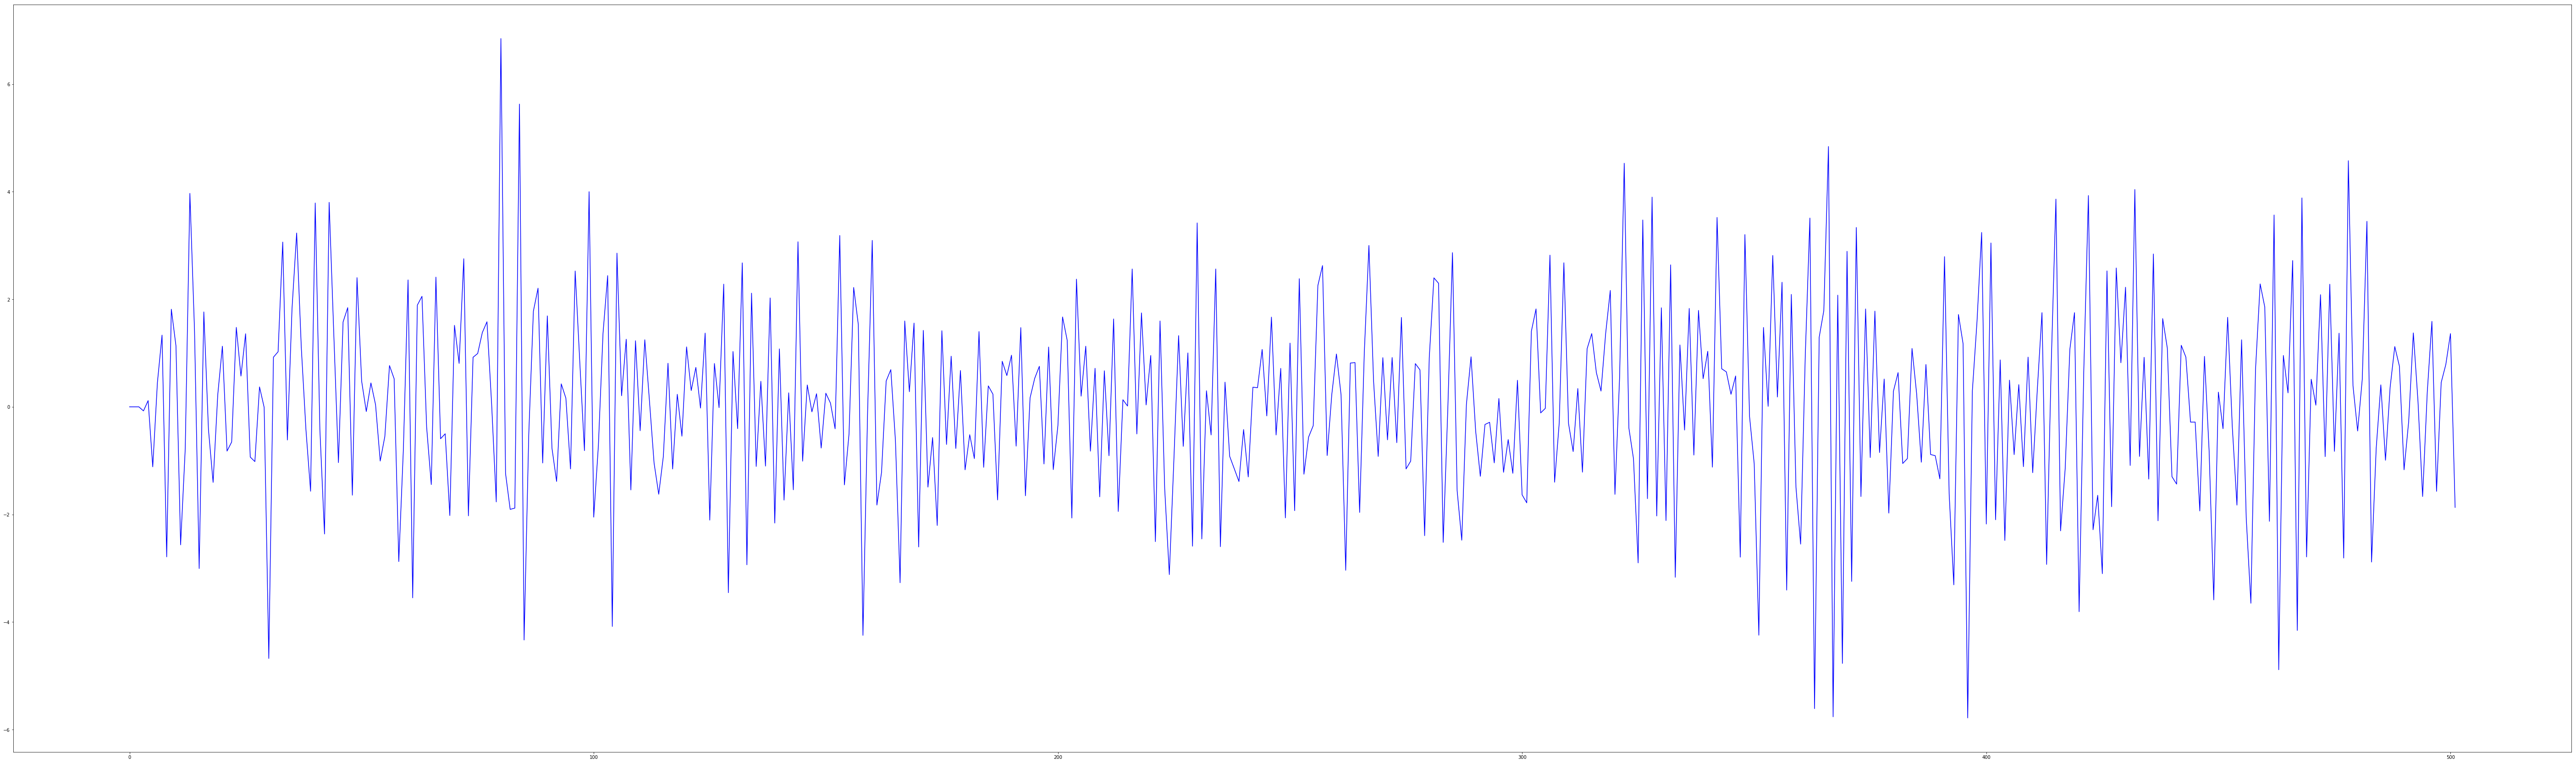

In [422]:
plt.figure(figsize=(100,30))

plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [423]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('1-6arima (3,2)+arch(1) level1.csv')

## NO1.AR(1,7,14)+garch(1,1)+trend-level2

In [424]:
epls= [0,0,0,0,0,0,0,0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

a_0 = 0.102
a_1 = 0.097
b_1 = 0.181
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [425]:
#ma_lag1=0.686
ar_lag1=0.514
ar_lag7=0.304
ar_lag14=0.104
m=[0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,500):
    x_t_1 =0.0092+ ar_lag1*m[i-1] + epls[i] + ar_lag7*m[i-7]+ar_lag14*m[i-14]+trend[i]*0.001
    m.append(x_t_1)

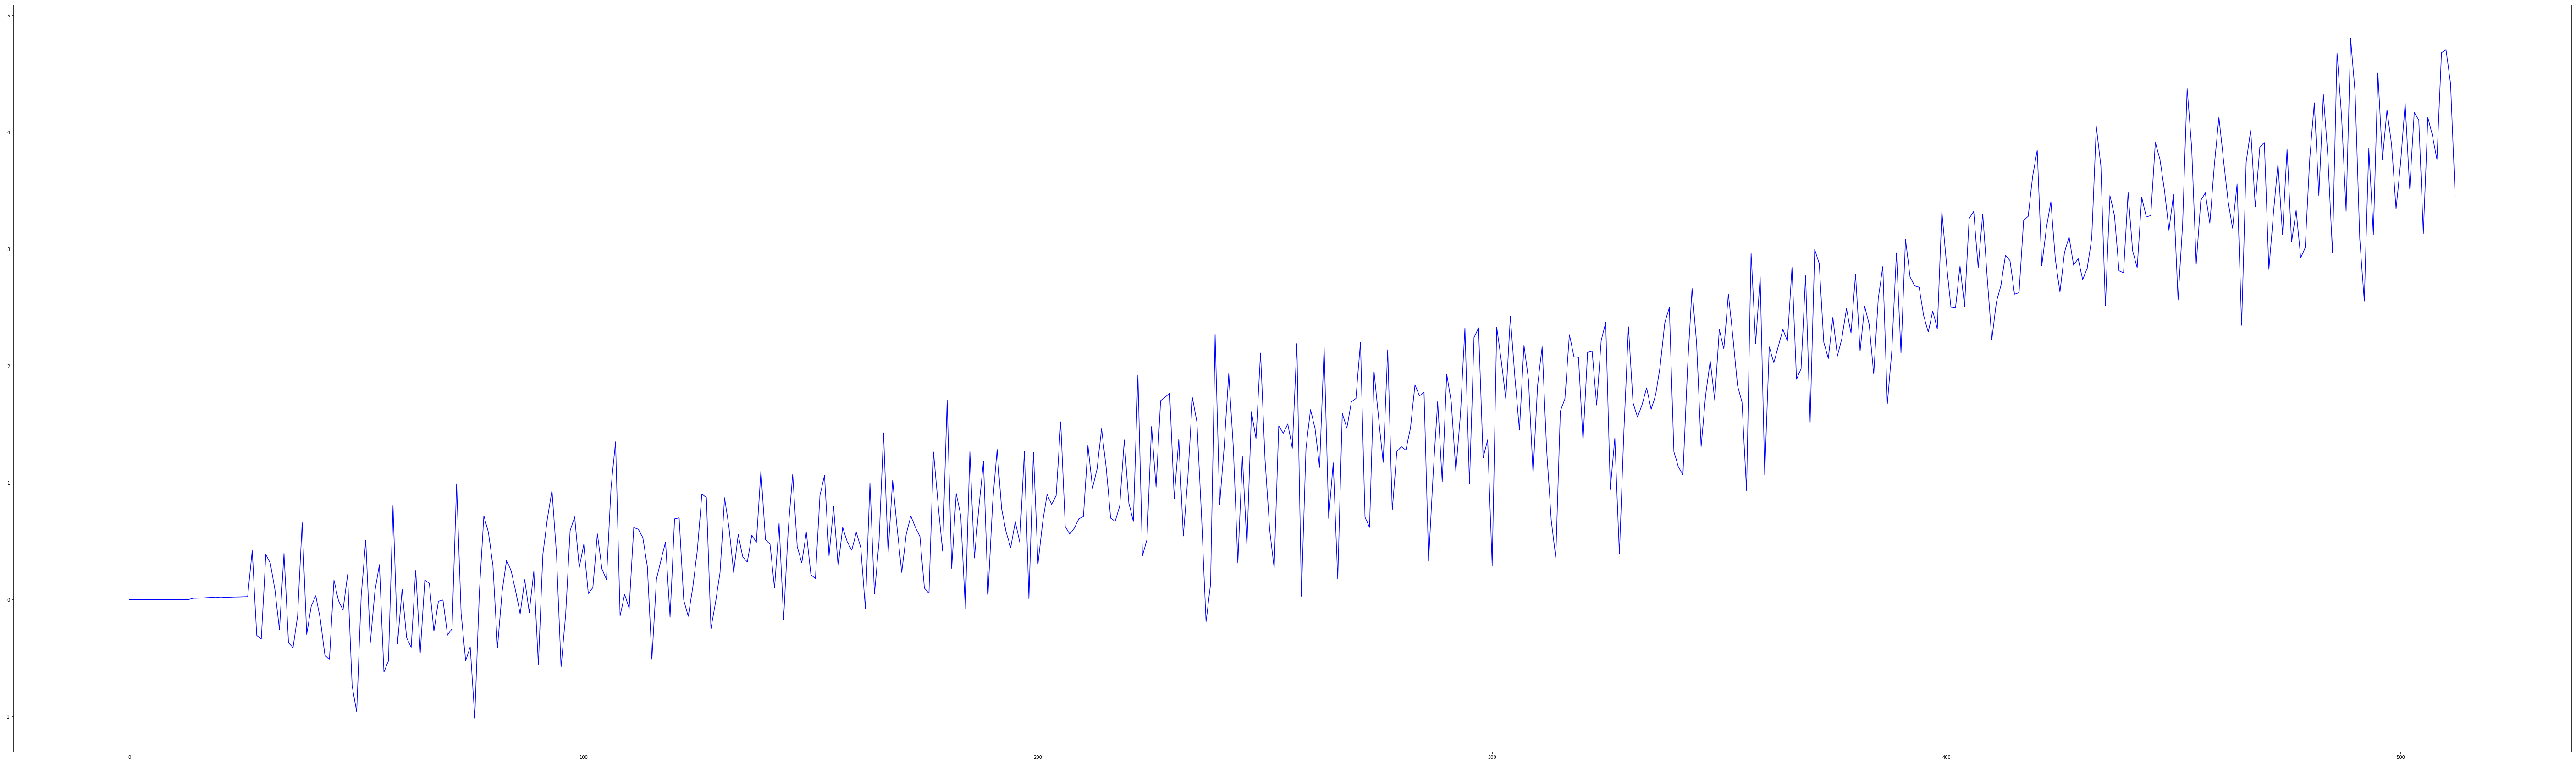

In [427]:
plt.figure(figsize=(100,30))

plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [428]:
m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('2-1AR(1,7,14)+garch(1,1)+trend-level2.csv')

## NO2.arima((4,8,12),(3,6,9))+garch11+trend_level2

In [434]:
epls= [0,0,0,0,0,0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0,0,0,0,0,0]

a_0 = 0.102
a_1 = 0.097
b_1 = 0.181
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [435]:
ar_lag4=0.214
ar_lag8=0.104
ar_lag12=0.314
ma_lag3=-0.186
ma_lag6=-0.137
ma_lag9=0.286

m=[0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,500):
    x_t_1 =0.092+ ar_lag4*m[i-4]+ ar_lag8*m[i-8] + ar_lag12*m[i-12] +epls[i] + ma_lag3*epls[i-3]+ma_lag6*epls[i-6]+ ma_lag9*epls[i-9]+trend[i]*0.0021
    m.append(x_t_1)

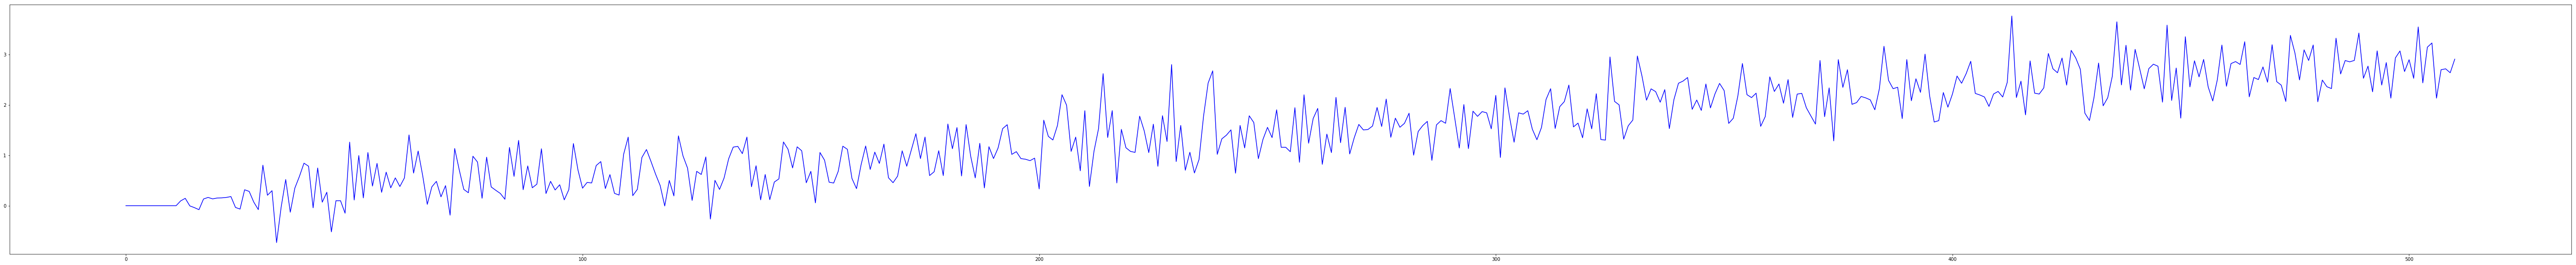

In [436]:
plt.figure(figsize=(100,10))
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [437]:
m_new=m[-300:]
len(m_new)
df =pd.DataFrame(data=m_new)
df.to_csv ('2-2arima((4,8,12),(3,6,9))+garch11+trend_level2.csv')

## NO3.ma(10,20)+garch11+trend_level2

In [438]:
len([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

20

In [439]:
epls= [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

a_0 = 0.02
a_1 = 0.097
b_1 = 0.381
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [440]:
ma_lag10=0.386
ma_lag20=0.537

m=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(1,500):
    x_t_1 =0.092+epls[i] + ma_lag10*epls[i-10]+ma_lag20*epls[i-20]+trend[i]*0.021
    m.append(x_t_1)

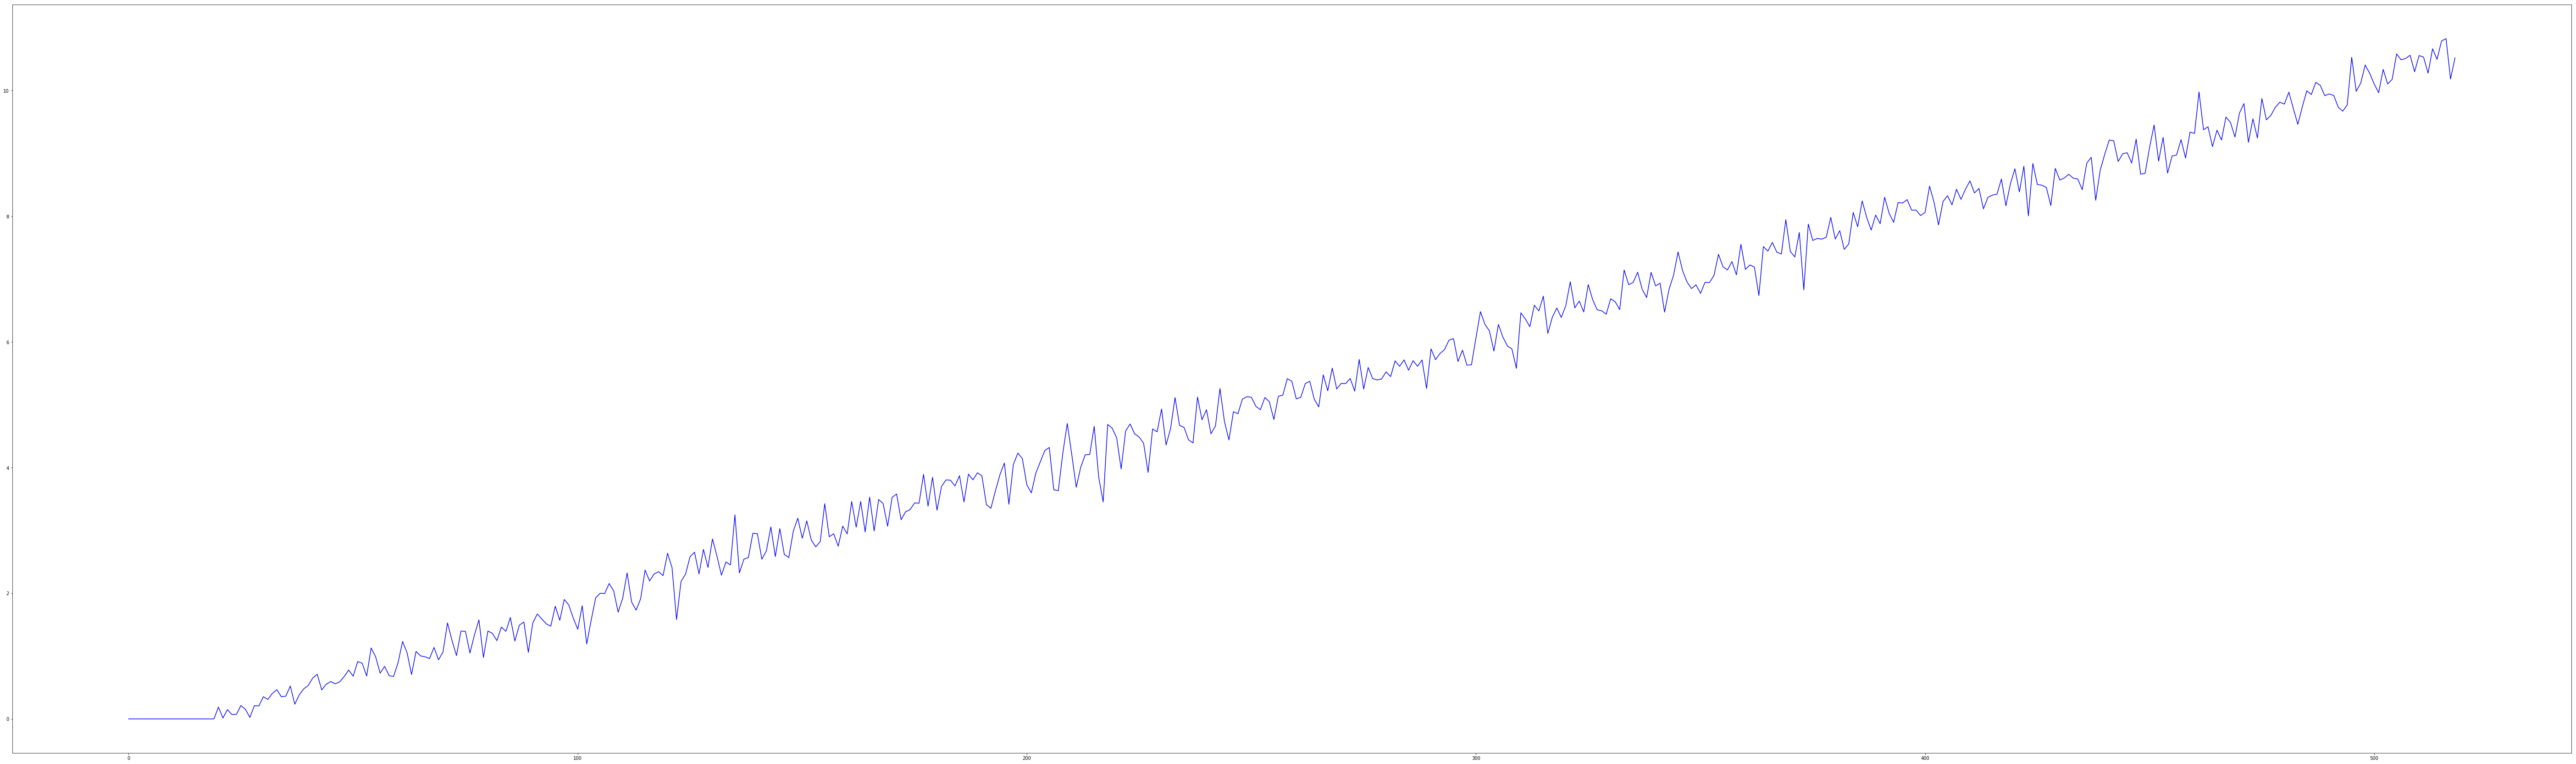

In [441]:
plt.figure(figsize=(100,30))
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [442]:
m_new=m[-300:]
len(m_new)
df =pd.DataFrame(data=m_new)
df.to_csv ('2-3ma(10,20)+garch11+trend_level2.csv')

# NO4.結構性改變+arima(1,1)+arch1 level2

In [443]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 1.19
a_1 = 0.457
for i in range(502):
    ht = a_0 + a_1* (epls[i]**2)  
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [444]:
ar_lag1=0.2545
ma_lag1=-0.286

m=[0]

for i in range(1,500):
    if i<426:
        d_t=1.000
    else:
        d_t=0.000
    x_t_1 =1.6015+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]-0.2244*d_t+0.5433*d_t*m[i-1]
    m.append(x_t_1)

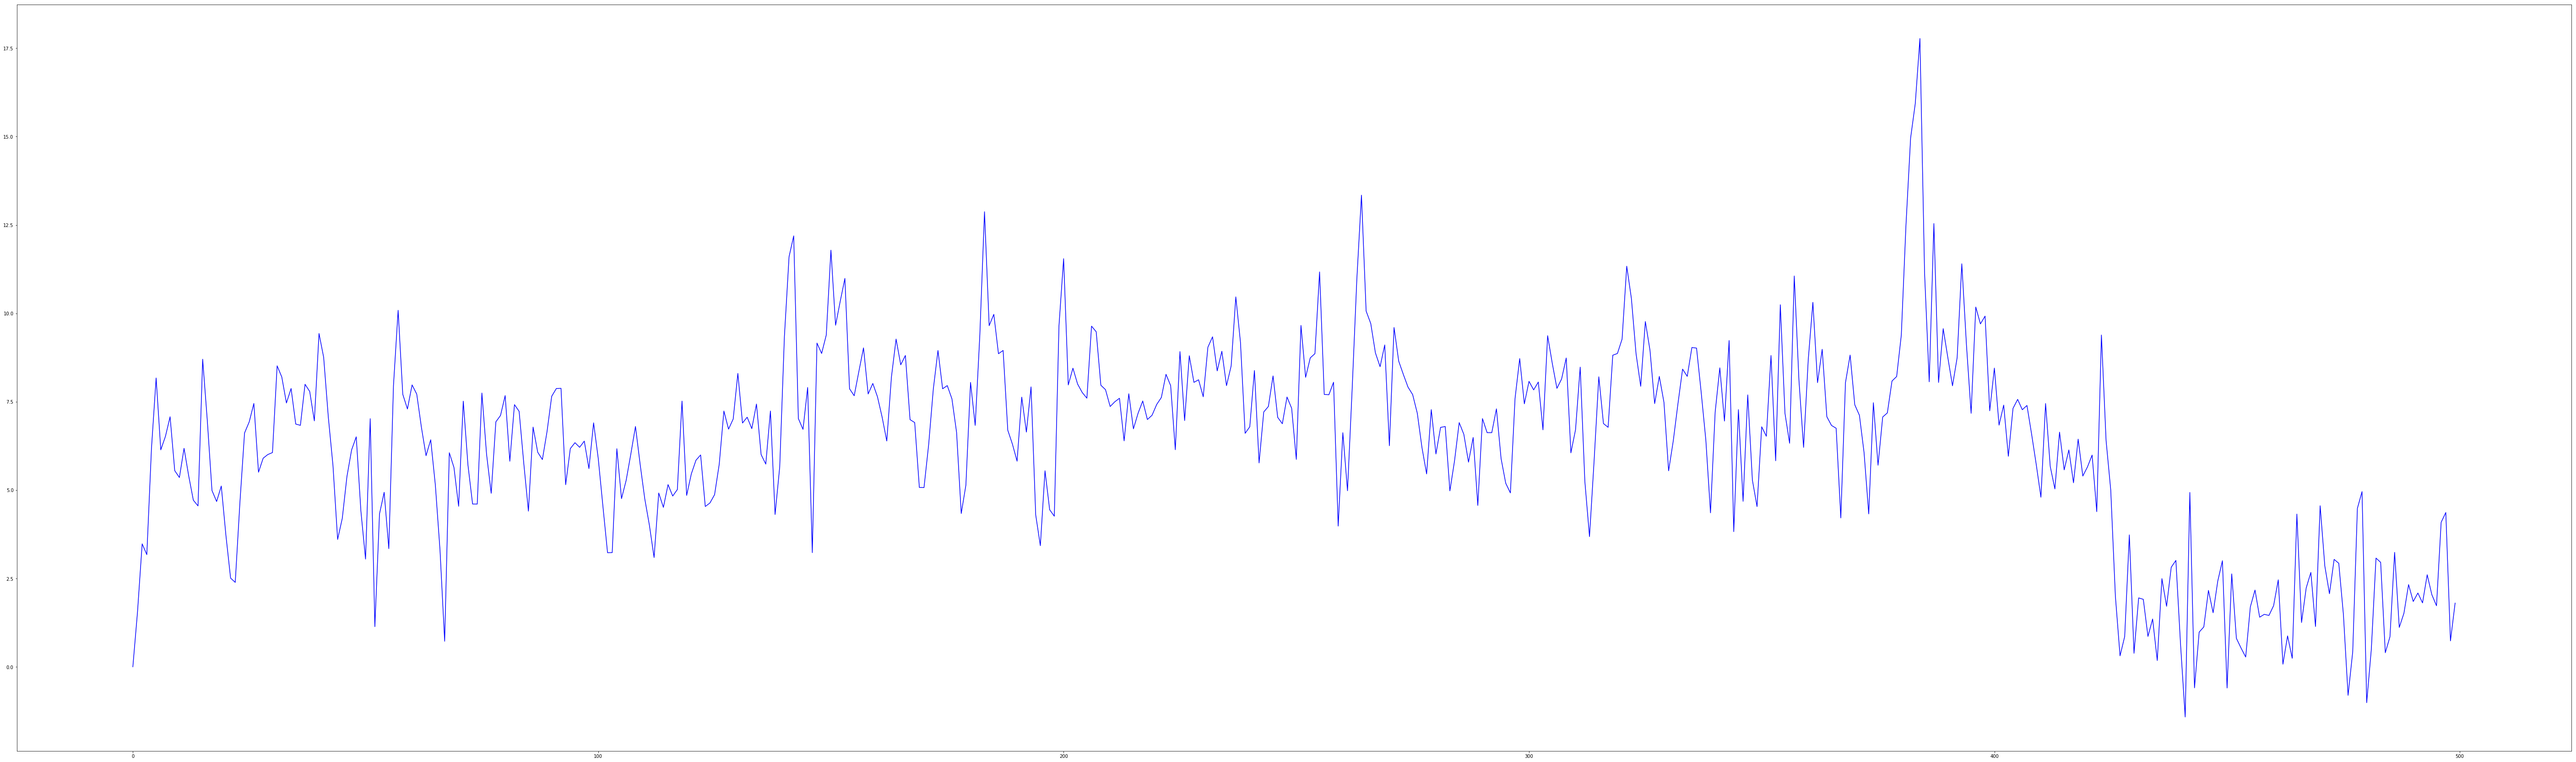

In [445]:
plt.figure(figsize=(100,30))
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [446]:
m_new=m[-300:]
len(m_new)
df =pd.DataFrame(data=m_new)
df.to_csv ('2-4結構性改變+arima(1,1)+arch1.csv')

## NO5.結構性改變+ar(1,4,8)+garch1,1 level2

In [447]:
epls= [0,0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0,0]

a_0 = 0.02
a_1 = 0.097
b_1 = 0.081
for i in range(500):
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i]
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [448]:
# a_{0}=0.3,epls_{t-1}=0,h_{t-1}=0
epls= [0,0,0,0,0,0,0,0]###garch(1,1會有兩個起始點)
h_t = [0,0,0,0,0,0,0,0]

a_0 = 1.19
a_1 = 0.457
for i in range(502):
    ht = a_0 + a_1* (epls[i]**2)  
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)

In [449]:
ar_lag1=0.5545
ar_lag4=0.1487
ar_lag8=-0.168

m=[0,0,0,0,0,0,0,0]

for i in range(1,500):
    if i<400:
        d_t=1.000
    else:
        d_t=0.000
    x_t_1 =1+ ar_lag1*m[i-1]+ ar_lag4*m[i-4]+ ar_lag8*m[i-8] + epls[i] +1.5*d_t+0.15*d_t*m[i-1]
    m.append(x_t_1)

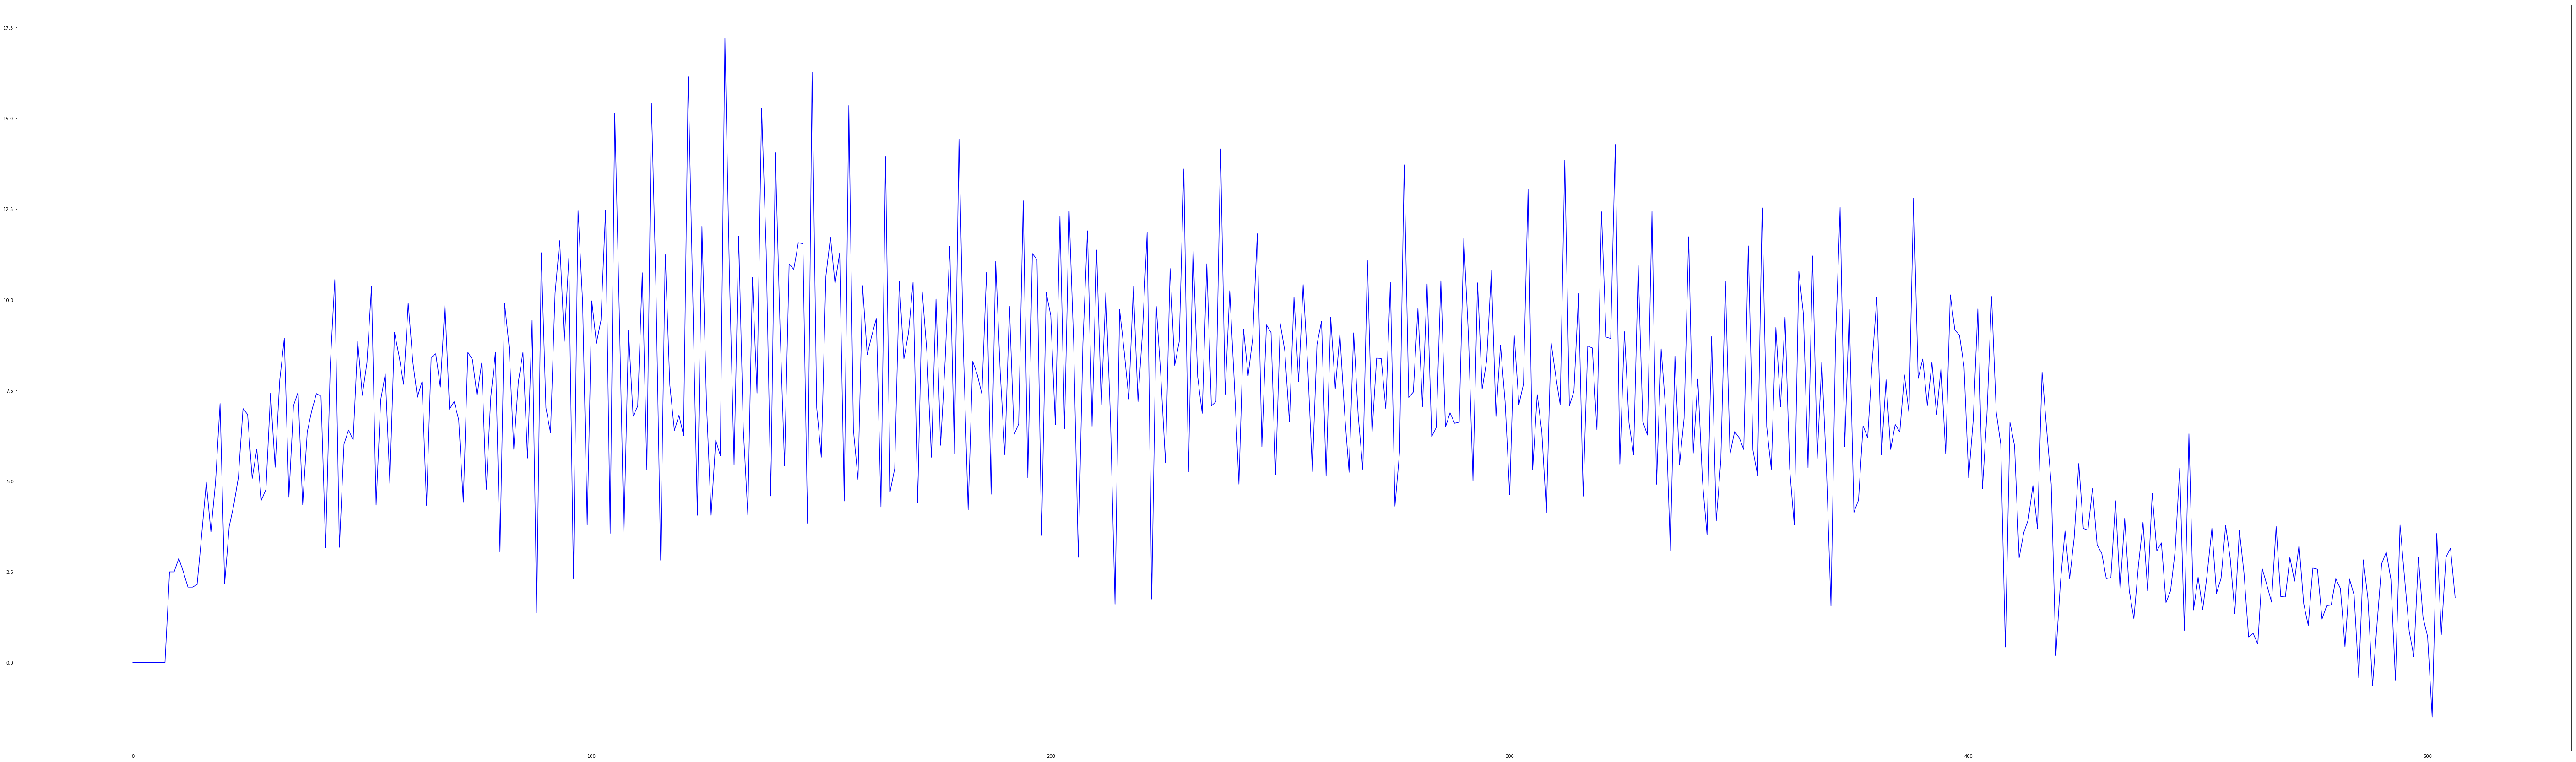

In [450]:
plt.figure(figsize=(100,30))
plt.plot(m,'blue')
#plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()

In [451]:
m_new=m[-300:]
len(m_new)
df =pd.DataFrame(data=m_new)
df.to_csv ('2-5結構性改變+arima(1,1)+arch1.csv')

# NO6.arima(1,1) fit Tarch(1,1) lv2


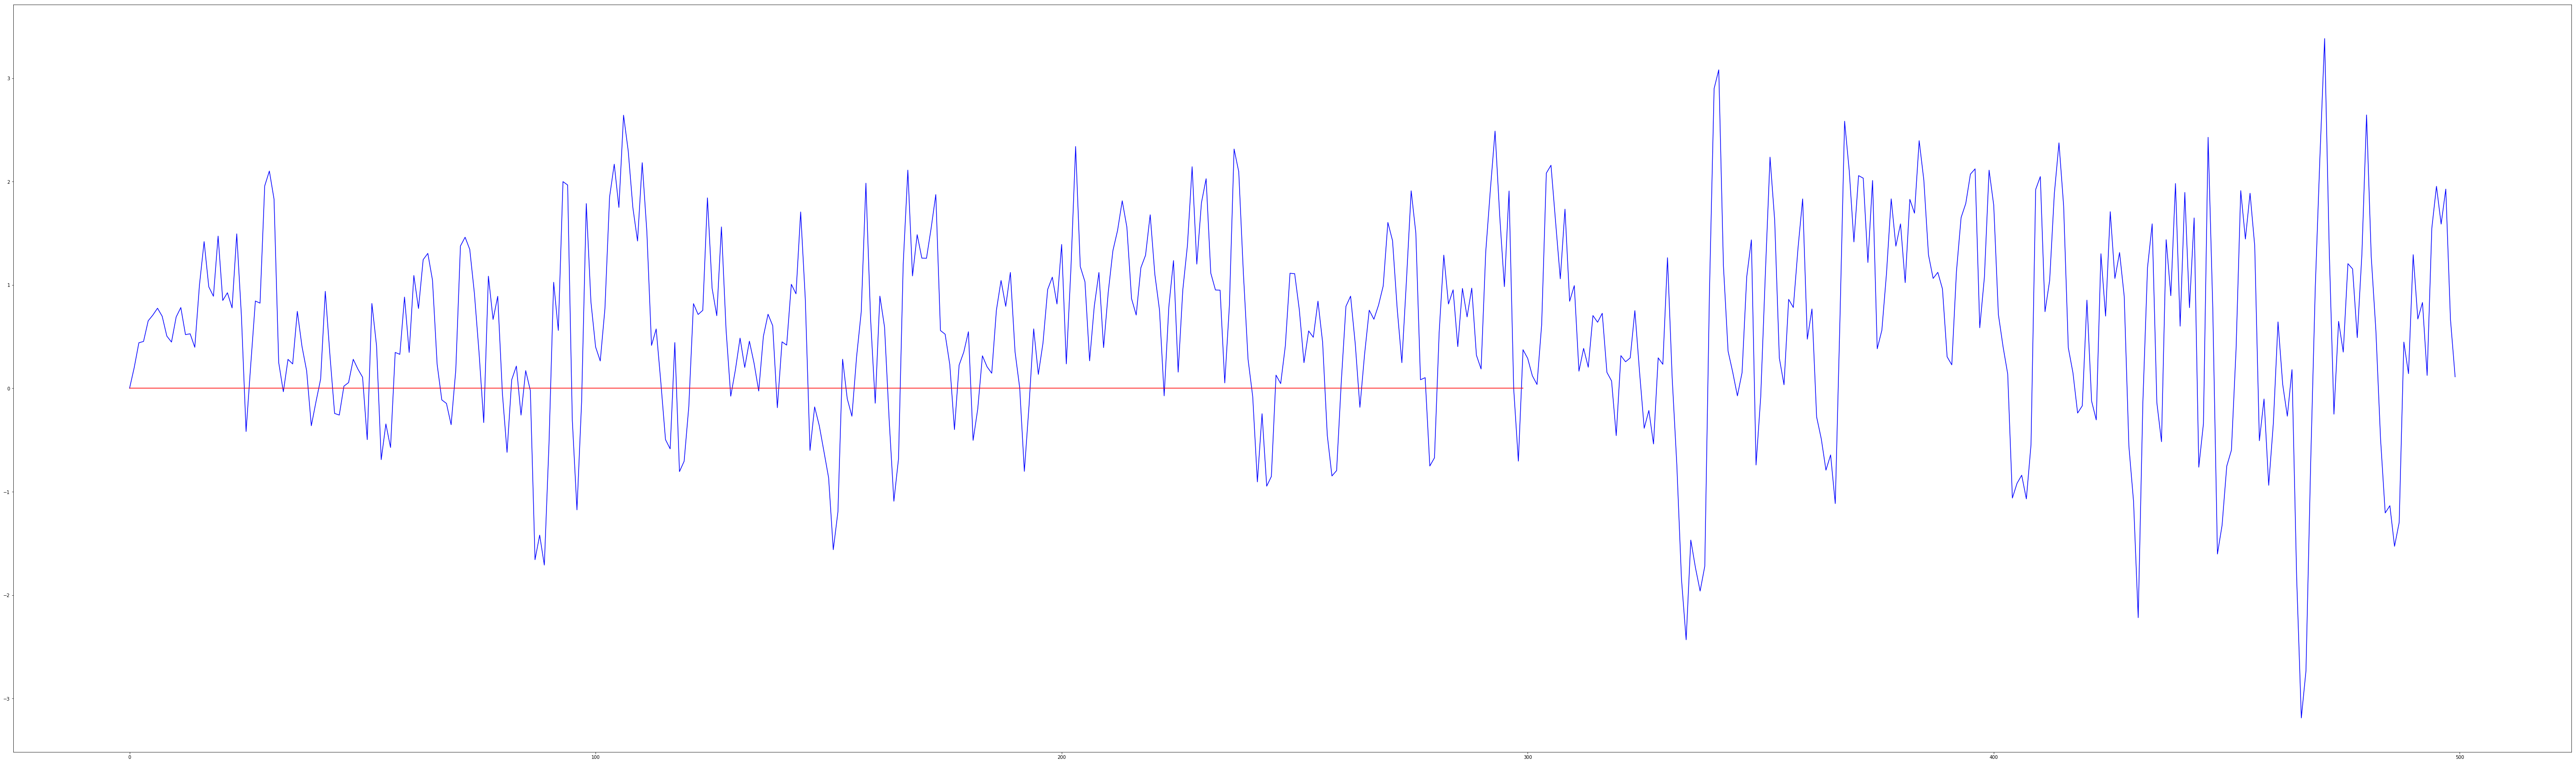

In [452]:
epls= [0]###garch(1,1會有兩個起始點)
h_t = [0]

a_0 = 0.010
a_1 = -0.022
b_1 = 0.933
a_2 = 0.154
for i in range(500):
    if epls[i-1]<0:
        d_t=1.000
    else:
        d_t=0.000
    #print(d_t)
    ht = a_0 + a_1* (epls[i]**2) + b_1*h_t[i] + a_2*d_t*(epls[i]**2)#####按照課本寫的話這條式子會出現ht<0造成程式出錯？
    #ht = abs(ht)#必須加絕對值才行
    epls_variable = (np.random.normal(loc=0.0, scale=1.0, size=None))*math.sqrt(ht) 
    h_t.append(ht)
    epls.append(epls_variable)
ma_lag1=0.225
ar_lag1=0.6
m=[0]

for i in range(1,500):
    x_t_1 =0.2+ ar_lag1*m[i-1] + epls[i] + ma_lag1*epls[i-1]#+0.000002*trend[i]
    m.append(x_t_1)
plt.figure(figsize=(100,30))

plt.plot(m,'blue')
plt.plot(z,'red')
#plt.ylim((-10,80))
plt.show()


m_new=m[-300:]
len(m_new)
df = pd.DataFrame(data=m_new)
df.to_csv ('2-6arima(1,1)_Tarch(1,1).csv')